[(0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5), (0.6, 0.6, 0.6), (0.6, 0.7, 0.7), (0.5, 0.8, 0.8), (0.4, 0.9, 0.9), (0.3, 1.0, 1.0), (0.2, 1.1, 1.0), (0.1, 1.2, 1.0), (0.0, 1.3, 1.0), (0.0, 1.4, 1.0), (0.0, 1.5, 1.0), (0.0, 1.6, 1.0), (0.0, 1.7, 1.0), (0.1, 1.8, 1.0), (0.2, 1.9, 1.0), (0.3, 2.0, 1.0), (0.4, 2.1, 1.0), (0.5, 2.2, 1.0), (0.6, 2.3, 1.0), (0.7, 2.3, 1.0), (0.8, 2.3, 1.0), (0.9, 2.3, 1.0), (1.0, 2.3, 1.0)]


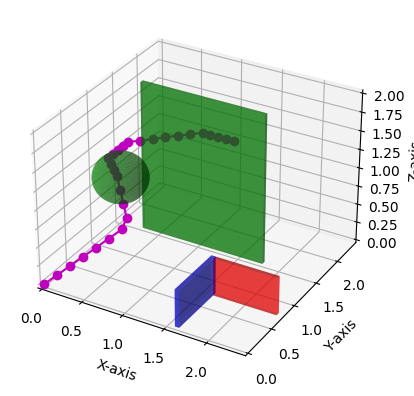

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import heapq
import math

# Function to draw a 3D rectangular prism given two opposite corners
def draw_rectangular_prism(ax, corner1, corner2, color='b', alpha=0.5):
    x = [corner1[0], corner2[0]]
    y = [corner1[1], corner2[1]]
    z = [corner1[2], corner2[2]]

    # Create 2D arrays for the faces
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, np.full_like(X, z[0]), color=color, alpha=alpha)
    ax.plot_surface(X, Y, np.full_like(X, z[1]), color=color, alpha=alpha)

    X, Z = np.meshgrid(x, z)
    ax.plot_surface(X, np.full_like(X, y[0]), Z, color=color, alpha=alpha)
    ax.plot_surface(X, np.full_like(X, y[1]), Z, color=color, alpha=alpha)

    Y, Z = np.meshgrid(y, z)
    ax.plot_surface(np.full_like(Y, x[0]), Y, Z, color=color, alpha=alpha)
    ax.plot_surface(np.full_like(Y, x[1]), Y, Z, color=color, alpha=alpha)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define two opposite corners of the rectangular prism

walls = []

# Wall 1
corner1_1 = np.array([1.6, 0, 0])
corner2_1 = np.array([1.65, 0.75, 0.5])
draw_rectangular_prism(ax, corner1_1, corner2_1, color='b', alpha=0.5)

walls.append((corner1_1, corner2_1))

# Wall 2
corner1_2 = np.array([1.65, 0.75, 0])
corner2_2 = np.array([2.4, 0.7, 0.5])
draw_rectangular_prism(ax, corner1_2, corner2_2, color='r', alpha=0.5)

walls.append((corner1_2, corner2_2))

# Wall 3
corner1_3 = np.array([0.3, 1.5, 0])
corner2_3 = np.array([1.8, 1.55, 2])
draw_rectangular_prism(ax, corner1_3, corner2_3, color='g', alpha=0.5)

walls.append((corner1_3, corner2_3))
# Sphere
sphere_center = np.array([0.6, 0.6, 1.3])
sphere_radius = 0.3
phi, theta = np.mgrid[0.0:2.0*np.pi:100j, 0.0:np.pi:50j]
x_sphere = sphere_radius * np.sin(theta) * np.cos(phi) + sphere_center[0]
y_sphere = sphere_radius * np.sin(theta) * np.sin(phi) + sphere_center[1]
z_sphere = sphere_radius * np.cos(theta) + sphere_center[2]
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='g', alpha=0.5)

# edge lengths
space = (2.4, 2.4, 2)
# space = (1, 1, 1)
edge_lengths = corner2_1 - corner1_1

# Define minimum distance from surfaces
min_distance = 0.25

# Create empty list for points
min_corner = np.array([0, 0, 0])
max_corner = space
spacing = 0.1

points = np.mgrid[min_corner[0]:max_corner[0]:spacing,
                      min_corner[1]:max_corner[1]:spacing,
                      min_corner[2]:max_corner[2]:spacing].reshape(3, -1).T

def is_collision(rect1, rect2):
    rect1_corner1, rect1_corner2 = rect1
    rect2_corner1, rect2_corner2 = rect2

    # Check if rectangles overlap along the x-axis
    if (rect1_corner1[0] <= rect2_corner2[0] and rect1_corner2[0] >= rect2_corner1[0]) or \
       (rect2_corner1[0] <= rect1_corner2[0] and rect2_corner2[0] >= rect1_corner1[0]):
        # Check if rectangles overlap along the y-axis
        if (rect1_corner1[1] <= rect2_corner2[1] and rect1_corner2[1] >= rect2_corner1[1]) or \
           (rect2_corner1[1] <= rect1_corner2[1] and rect2_corner2[1] >= rect1_corner1[1]):

           if (rect1_corner1[2] <= rect2_corner2[2] and rect1_corner2[2] >= rect2_corner1[2]) or \
              (rect2_corner1[2] <= rect1_corner2[2] and rect2_corner2[2] >= rect1_corner1[2]):
                return True  # Collision detected
    return False  # No collision

valid_points = []
for point in points:
    x, y, z = point[0], point[1], point[2]

    for min_corner, max_corner in walls:
        if (point[0] >= min_corner[0] and point[0] <= max_corner[0] and
            point[1] >= min_corner[1] and point[1] <= max_corner[1]):
            continue  # Skip this point, it's inside the rectangle

        # Check if the point is within the rectangle's X-Z boundaries
        if (point[0] >= min_corner[0] and point[0] <= max_corner[0] and
            point[2] >= min_corner[2] and point[2] <= max_corner[2]):
            continue  # Skip this point, it's inside the rectangle

        # Check if the point is within the rectangle's Y-Z boundaries
        if (point[1] >= min_corner[1] and point[1] <= max_corner[1] and
            point[2] >= min_corner[2] and point[2] <= max_corner[2]):
            continue  # Skip this point, it's inside the rectangle

        valid_points.append(point)

valid_points = np.array(valid_points)

start_pos = (0.3, 0.3, 0.5)
end_pos = (0.3, 2.2, 1)

drone_pos = (0.4, 0.4, 0.2)
drone_bounds = ((-0.2, -0.2, -0.1), (0.2, 0.2, 0.1))

queue = [(0, 0, 0)]
valid_points_set = set()
valid_points = {}
valid_points[(0, 0, 0)] = set()

spacing = 0.1

visited = set()
visited.add((0, 0, 0))

while len(queue) > 0:
    x, y, z = queue.pop(0)

    neighbors = []

    for dx in range(-1, 2):
        for dy in range(-1, 2):
            for dz in range(-1, 2):
                if dx == dy == dz == 0:
                    continue  # Skip the current point

                new_x, new_y, new_z = round(x + (dx * spacing), 1), round(y + (dy * spacing), 1), round(z + (dz * spacing), 1)
                new_pos = (new_x, new_y, new_z)

                new_drone_bound = (tuple(x + y for x, y in zip(drone_bounds[0], new_pos)),
                                   tuple(x + y for x, y in zip(drone_bounds[1], new_pos)))

                if 0 <= new_x < space[0] and 0 <= new_y < space[1] and 0 <= new_z < space[2]:
                    collision = False
                    for wall in walls:
                        if is_collision(new_drone_bound, wall):
                           collision = True

                    if not collision:
                        if new_pos not in visited:
                            visited.add(new_pos)
                            queue.append(new_pos)
                            valid_points[new_pos] = set()
                            valid_points[new_pos].add((x, y, z))
                            valid_points[(x, y, z)].add(new_pos)
                        else:
                            valid_points[new_pos].add((x, y, z))


def heuristic(a, b):
    """Manhattan distance as a heuristic"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

def reconstruct_path(came_from, current):
    """Reconstructs the path from the goal to the start"""
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


def check_overlap(cylinder, wall):
    """
    Checks if a cylinder and a rectangle defined by two points overlap in 3D space.

    Args:
        cylinder: A dictionary containing the cylinder's center, radius, and height.
        wall: A tuple representing the bottom and top corner of a rectangle

    Returns:
        True if the cylinder and rectangle overlap, False otherwise.
    """

    point1, point2 = wall

    # Extract cylinder properties
    cylinder_center = np.array(cylinder["center"])
    cylinder_radius = cylinder["radius"]
    cylinder_height = cylinder["height"]

    # Calculate rectangle center and dimensions
    rectangle_center = (point1 + point2) / 2
    rectangle_dimensions = np.abs(point2 - point1)

    # Check if any face of the cylinder is making contact with any face of the rectangle
    for i in range(3):
        axis = np.zeros(3)
        axis[i] = 1

        # Project cylinder center onto rectangle axis
        projected_center = rectangle_center + np.dot(cylinder_center - rectangle_center, axis) * axis

        # Check if projection falls within rectangle bounds
        if np.abs(projected_center - rectangle_center)[0] <= 0.5 * rectangle_dimensions[0] + cylinder_radius and \
           np.abs(projected_center - rectangle_center)[1] <= 0.5 * rectangle_dimensions[1] + cylinder_radius and \
           np.abs(projected_center - rectangle_center)[2] <= 0.5 * rectangle_dimensions[2] + cylinder_radius:
            return True

    # Check if rectangle corners intersect cylinder
    for corner in [point1, point2]:
        distance_sq = np.sum((corner - cylinder_center)**2)
        if distance_sq <= cylinder_radius**2:
            return True

    return False

def get_neighbors(point, space):
    """Gets all 27 adjacent points in 3D space"""
    x, y, z = point
    neighbors = []
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            for dz in range(-1, 2):
                if dx == dy == dz == 0:
                    continue  # Skip the current point
                new_x, new_y, new_z = round(x + (dx * spacing), 1), round(y + (dy * spacing), 1), round(z + (dz * spacing), 1)
                if 0 <= new_x < space[0] and 0 <= new_y < space[1] and 0 <= new_z < space[2]:
                    overlap = 0


                    new_drone_bound = (tuple(x + y for x, y in zip(drone_bounds[0], point)),
                                       tuple(x + y for x, y in zip(drone_bounds[1], point)))

                    for wall in walls:
                        if is_collision(new_drone_bound, wall):
                            overlap += 1

                    if overlap == 0:
                        neighbors.append((new_x, new_y, new_z))
    return neighbors

def a_star(start, goal, grid):
    """A* algorithm implementation for 3D space with 27-connected points"""

    open_set = [(0, start)]  # Priority queue, (f_score, node)
    came_from = {}  # Track parent nodes
    g_score = {start: 0}  # Cost to reach a node
    f_score = {start: heuristic(start, goal)}  # Estimated total cost

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current, space):
            tentative_g_score = g_score[current] + 1  # Assuming uniform cost of 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

path = a_star((0, 0, 0), (1, 2.3, 1), valid_points)
print(path)
line_segments = np.array(path)
ax.plot(line_segments[:, 0], line_segments[:, 1], line_segments[:, 2], color='m', marker='o')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.set_xlim([0, 2.4])
ax.set_ylim([0, 2.4])
ax.set_zlim([0, 2])

# Show the plot
plt.show()

In [ ]:
path

[(0, 0, 0),
 (0.1, 0.1, 0.1),
 (0.2, 0.2, 0.2),
 (0.3, 0.3, 0.3),
 (0.4, 0.4, 0.4),
 (0.5, 0.5, 0.5),
 (0.6, 0.6, 0.6),
 (0.6, 0.7, 0.7),
 (0.5, 0.8, 0.8),
 (0.4, 0.9, 0.9),
 (0.3, 1.0, 1.0),
 (0.2, 1.1, 1.0),
 (0.1, 1.2, 1.0),
 (0.0, 1.3, 1.0),
 (0.0, 1.4, 1.0),
 (0.0, 1.5, 1.0),
 (0.0, 1.6, 1.0),
 (0.0, 1.7, 1.0),
 (0.1, 1.8, 1.0),
 (0.2, 1.9, 1.0),
 (0.3, 2.0, 1.0),
 (0.4, 2.1, 1.0),
 (0.5, 2.2, 1.0),
 (0.6, 2.3, 1.0),
 (0.7, 2.3, 1.0),
 (0.8, 2.3, 1.0),
 (0.9, 2.3, 1.0),
 (1.0, 2.3, 1.0)]

In [ ]:
import rospy
import numpy as np
from clover.srv import Navigate, NavigateRequest
from gazebo_msgs.msg import ModelStates, ModelState


class PathPlanner():
    def __init__(self):
        super(PathPlanner, self).__init__()

        self.current_position = np.array([0.0, 0.0, 0.0])
        self.target_position = np.array([1.0, 1.0, 1.0])

        rospy.init_node('path_planner', anonymous=True)
        self.navigate_service = rospy.ServiceProxy('/navigate', Navigate)

    def get_current_position(self):
        try:
            model_states = rospy.wait_for_message('/gazebo/model_states', ModelStates, timeout=5)
            drone_index = model_states.name.index('clover')
            position = model_states.pose[drone_index].position
            #print("Current position:", position.x, position.y, position.z)
            '''
            # imitate vicon behavior
            vision_pose_msg = PoseStamped()

            vision_pose_msg.header.stamp = rospy.Time.now()
            vision_pose_msg.header.frame_id = "world"

            vision_pose_msg.pose.position = position
            vision_pose_msg.pose.orientation = orientation

            self.vision_pose_pub.publish(vision_pose_msg)
            # imitate vicon behavior end
            '''
            return  np.array([position.x, position.y, position.z])


        except rospy.ROSException as e:
            print("Failed to get position message within timeout:", str(e))
            return np.array([0, 0, 0]), True
        except rospy.ROSInterruptException:
            print("Node was shutdown")


    def navigate(self, x, y, z):
        navigate_request = NavigateRequest()
        navigate_request.x = x
        navigate_request.y = y
        navigate_request.z = z
        navigate_request.frame_id = 'map'
        navigate_request.auto_arm = 1
        try:
            response = self.navigate_service(navigate_request)
            print("navigate setpoint: ", x, y, z)
            #print("Service call successful. Response: ", response)
        except rospy.ServiceException as e:
            print("Service call failed: %s" % e)

path_planner = PathPlanner()

for setpoint in path:
  path_planner.navigate(setpoint[0], setpoint[1], setpoint[2])
  while np.linalg.norm(path_planner.get_current_position()[0] - np.array(setpoint)) > 0.25:
    rospy.sleep(1)
print("Got to the target!")